# 13 LGBM & XGBM 

### Objective:
- The objective of this assignment is to compare the performance of Light GBM and XG Boost algorithms using the Titanic dataset. 

### Exploratory Data Analysis (EDA):
- 1.	Load the Titanic dataset using Python's pandas library.
- 2.	Check for missing values.
- 3.	Explore data distributions using histograms and box plots.
- 4.	Visualize relationships between features and survival using scatter plots and bar plots

In [1]:
!pip install lightgbm

In [2]:
import pandas as pd #Import library 
df = pd.read_csv("diabetes.csv") #load dataset (it's not titanic dataset) 
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info() # information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.describe().T # statistical summary of numerical ccolumns

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [5]:
df.isnull().sum() # check null values

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [6]:
df.duplicated().sum() # check duplicates 

0

In [7]:
df.dtypes #check data types of each columns

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 

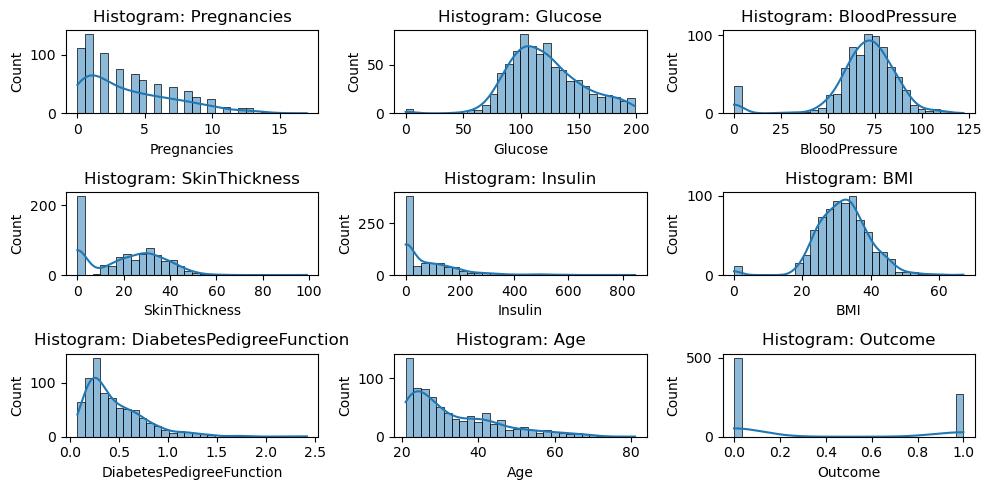

In [9]:
num_cols = df.select_dtypes(include=[np.number]).columns.tolist() #Find Numerical Columns 
plt.figure(figsize=(10,5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3,3, i)
    sns.histplot(df[col], kde=True, bins=30) #Plot Histplot Of Each Numerical Columns TO identify Features Distributions
    plt.title(f"Histogram: {col}")
plt.tight_layout()
plt.show()

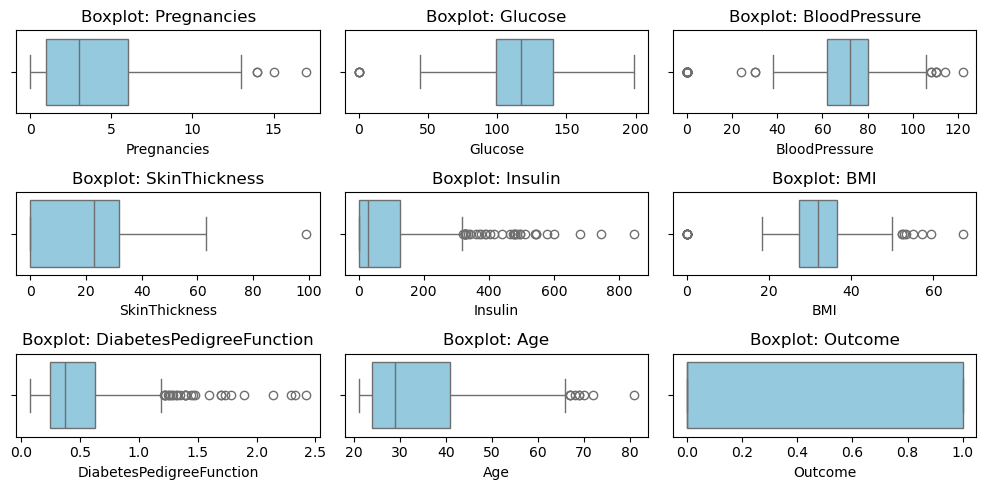

In [10]:
plt.figure(figsize=(10, 5))
for i, col in enumerate(num_cols, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=df[col], color="skyblue")  #Plot Boxplot For Outlier Detection 
    plt.title(f"Boxplot: {col}")
plt.tight_layout()
plt.show()

<Axes: >

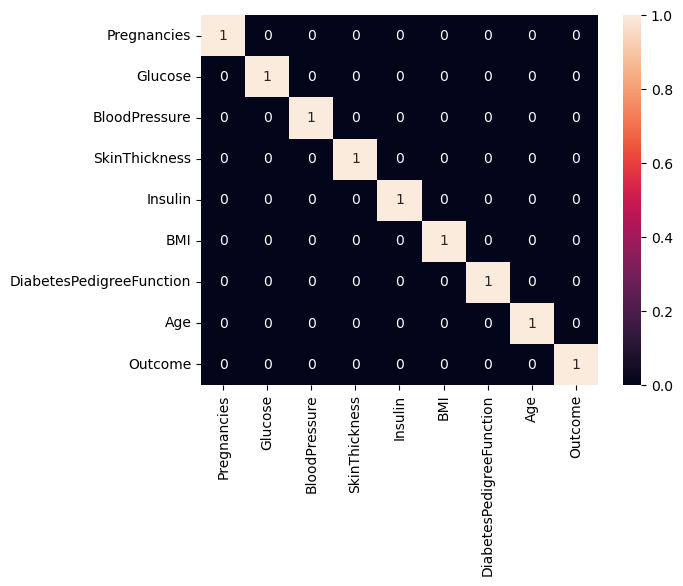

In [11]:
sns.heatmap(df.corr(numeric_only=True) > 0.7 , annot=True) # heatmap for check corrections between numercal columns

### Data Preprocessing:
- 1.	Impute missing values.
- 2.	Encode categorical variables using one-hot encoding or label encoding. 
- 3.	If needed you can apply more preprocessing methods on the given dataset. 

In [12]:
x = df.drop("Outcome", axis=1) # Split data into x and y
y = df['Outcome']

In [13]:
from sklearn.preprocessing import StandardScaler # import standard scaler 
ss = StandardScaler()
x_sc = ss.fit_transform(x) # apply standard scaler on x

<Axes: xlabel='Outcome', ylabel='count'>

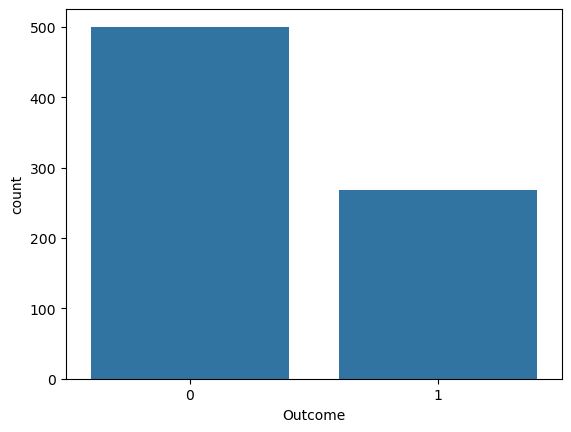

In [14]:
sns.countplot(x=y) # check data is balance or imbalance 

### Building Predictive Models:
- 1.	Split the preprocessed dataset into training and testing sets.
- 2.	Choose appropriate evaluation metrics (e.g., accuracy, precision, recall, F1-score) for model evaluation.
- 3.	Build predictive models using LightGBM and XGBoost algorithms.
- 4.	Train the models on the training set and evaluate their performance on the testing set.
- 5.	Use techniques like cross-validation and hyperparameter tuning to optimize model performance.

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42, stratify = y)


In [16]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier( n_estimators=100,max_depth=4,learning_rate=0.1,random_state=42)

xgb_model.fit(x_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=4,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [17]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(n_estimators=100,max_depth=4,learning_rate=0.1,random_state=42)

lgb_model.fit(x_train, y_train)

[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001745 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


LGBMClassifier(max_depth=4, random_state=42)

In [18]:
y_pred_xg = xgb_model.predict(x_test)

In [19]:
y_pred_lg = lgb_model.predict(x_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report,accuracy_score,precision_score,recall_score,f1_score

print(f"Confusion Matrix of XGBoost: \n{confusion_matrix(y_test, y_pred_xg)}")
print(classification_report(y_test, y_pred_xg))

Confusion Matrix of XGBoost: 
[[132  18]
 [ 37  44]]
              precision    recall  f1-score   support

           0       0.78      0.88      0.83       150
           1       0.71      0.54      0.62        81

    accuracy                           0.76       231
   macro avg       0.75      0.71      0.72       231
weighted avg       0.76      0.76      0.75       231



In [21]:
print(f"Confusion Matrix of LGBoost: \n{confusion_matrix(y_test, y_pred_lg)}")
print(classification_report(y_test, y_pred_lg))

Confusion Matrix of LGBoost: 
[[130  20]
 [ 36  45]]
              precision    recall  f1-score   support

           0       0.78      0.87      0.82       150
           1       0.69      0.56      0.62        81

    accuracy                           0.76       231
   macro avg       0.74      0.71      0.72       231
weighted avg       0.75      0.76      0.75       231



In [22]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [15, 31, 63]
}

In [23]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

# Optimize LGB model performence

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=lgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits
[LightGBM] [Info] Number of positive: 187, number of negative: 350
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000845 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 610
[LightGBM] [Info] Number of data points in the train set: 537, number of used features: 8
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.348231 -> initscore=-0.626825
[LightGBM] [Info] Start training from score -0.626825
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[L

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LGBMClassifier(max_depth=4, random_state=42), n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='accuracy', verbose=1)

In [24]:
print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred_lgb_class = best_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy of LGBM on grid search cv:", accuracy_score(y_test, y_pred_lgb_class))
print(classification_report(y_test, y_pred_lgb_class))

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 15}
Test Accuracy of LGBM on grid search cv: 0.7402597402597403
              precision    recall  f1-score   support

           0       0.76      0.87      0.81       150
           1       0.67      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.69       231
weighted avg       0.73      0.74      0.73       231



In [25]:
# Optimize XGB model performence

kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

grid_search = GridSearchCV(estimator=xgb_model,
                           param_grid=param_grid,
                           scoring='accuracy',
                           cv=kfold,
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


C:\Users\shivi\anaconda3\Lib\site-packages\xgboost\training.py:199: UserWarning: [13:11:02] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:790: 
Parameters: { "num_leaves" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, feature_weights=None,
                                     gamma=None, grow_polic...
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=4,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=100,
                                     n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [50, 100, 200],
                         'num_leaves': [15, 31, 63]},
             scoring='accuracy', verbose=1)

In [26]:
print("Best Parameters:", grid_search.best_params_)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 200, 'num_leaves': 15}


In [27]:
best_model = grid_search.best_estimator_

y_pred_xgb_class = best_model.predict(x_test)

from sklearn.metrics import accuracy_score, classification_report
print("Test Accuracy of XGBM on grid search cv::", accuracy_score(y_test, y_pred_xgb_class))
print(classification_report(y_test, y_pred_xgb_class))

Test Accuracy of XGBM on grid search cv:: 0.7445887445887446
              precision    recall  f1-score   support

           0       0.77      0.87      0.82       150
           1       0.68      0.51      0.58        81

    accuracy                           0.74       231
   macro avg       0.72      0.69      0.70       231
weighted avg       0.74      0.74      0.73       231



### Comparative Analysis:
- 1.	Compare the performance metrics (e.g., accuracy, precision, recall) of LightGBM and XGBoost models.

##### Accuracy
- LightGBM Accuracy: 0.7446
- XGBoost Accuracy: 0.7446
- Both models show identical accuracy, indicating similar overall classification performance.
##### Precision
- LightGBM :
        - Class 0 :0.77
        - Class 1 :0.68
- XGBoost :
      - Class 0 :0.77
      - Class 1 :0.68
- Both models are better at predicting Class 0 than Class 1.
- Precision for the minority class (Class 1) is moderate.
##### Recall
- LightGBM :
        - Class 0 :0.87
        - Class 1 :0.51
- XGBoost :
      - Class 0 :0.87
      - Class 1 :0.51
- High recall for Class 0
- Low recall for Class 1, meaning many Class 1 samples are misclassified.
##### F1-Score
- LightGBM :
        - Class 0 :0.82
        - Class 1 :0.58
- XGBoost :
      - Class 0 :0.82
      - Class 1 :0.58
- Identical F1-scores indicate equal balance between precision and recall for both models.

- 2.	Visualize and interpret the results to identify the strengths and weaknesses of each algorithm.

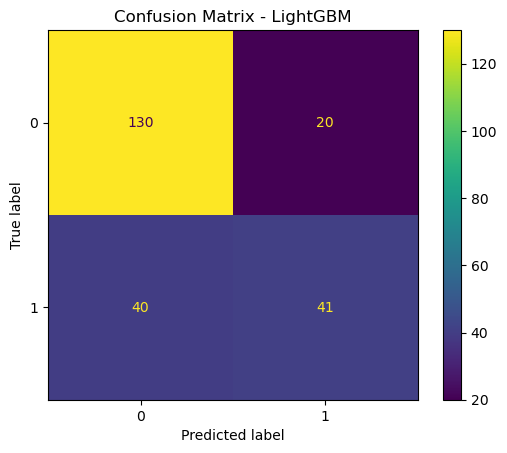

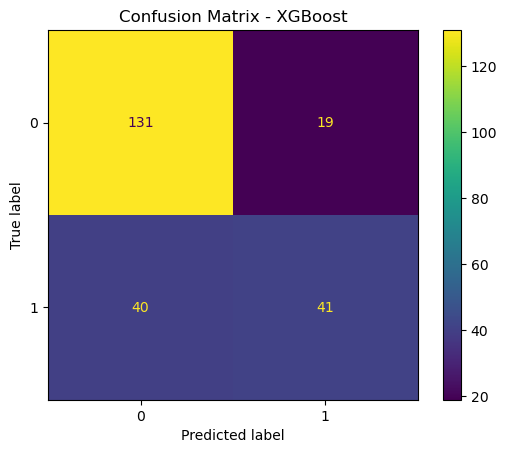

In [28]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# For LightGBM
cm_lgb = confusion_matrix(y_test, y_pred_lgb_class)
ConfusionMatrixDisplay(cm_lgb).plot()
plt.title("Confusion Matrix - LightGBM")
plt.show()

# For XGBoost
cm_xgb = confusion_matrix(y_test, y_pred_xgb_class)
ConfusionMatrixDisplay(cm_xgb).plot()
plt.title("Confusion Matrix - XGBoost")
plt.show()

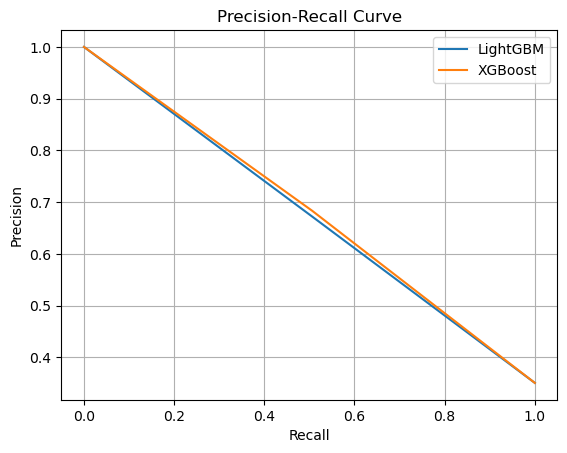

In [30]:
from sklearn.metrics import precision_recall_curve

prec_lgb, rec_lgb, _ = precision_recall_curve(y_test, y_pred_lgb_class)
prec_xgb, rec_xgb, _ = precision_recall_curve(y_test, y_pred_xgb_class)

plt.plot(rec_lgb, prec_lgb, label='LightGBM')
plt.plot(rec_xgb, prec_xgb, label='XGBoost')
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision-Recall Curve")
plt.legend()
plt.grid()
plt.show()